# Problem Statement
In the appended .csv file you can find a log, which was written by one of our devices.
It contains temperature data of different locations throughout the device, stats of the compute unit and some scanner values.

## Task 1
Your first task is to grab the temperature and CPU data from the csv file and plot it into a single window.
The data of the individual components should be bundled and put into different planes (e.g., PMU temperature sensor data should be an individual plane).
The blocks shall contain:
* PMU
* Cam
* CPU
* Scanner

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file and create a DataFrame
data = pd.read_csv('2023-01-12_14-07-53_stats.csv', delimiter=';')
# check shape and columns names
print(data.shape)
print(data.columns)

(256, 28)
Index(['Timestamp', 'Cam0_Temp', 'Cam1_Temp', 'Cam2_Temp', 'PMU_Temp1',
       'PMU_Temp2', 'PMU_Voltage', 'PMU_Current', 'PMU_Power', 'CPU_Temp',
       'CPU_MHz', 'CPU_Load', 'CPU_Chipset_Temp',
       'Scanner_Top_bottom_circuit_rt1', 'Scanner_Top_bottom_circuit_rt2',
       'Scanner_Top_laser_emitting_board_rt1',
       'Scanner_Top_laser_emitting_board_rt2',
       'Scanner_Top_receiving_board_rt1', 'Scanner_Top_top_circuit_rt1',
       'Scanner_Bot_bottom_circuit_rt1', 'Scanner_Bot_bottom_circuit_rt2',
       'Scanner_Bot_avg_tmp', 'Scanner_Bot_laser_emitting_board_rt1',
       'Scanner_Bot_laser_emitting_board_rt2',
       'Scanner_Bot_receiving_board_rt1', 'Scanner_Bot_top_circuit_rt1',
       'Angle', 'Distance'],
      dtype='object')


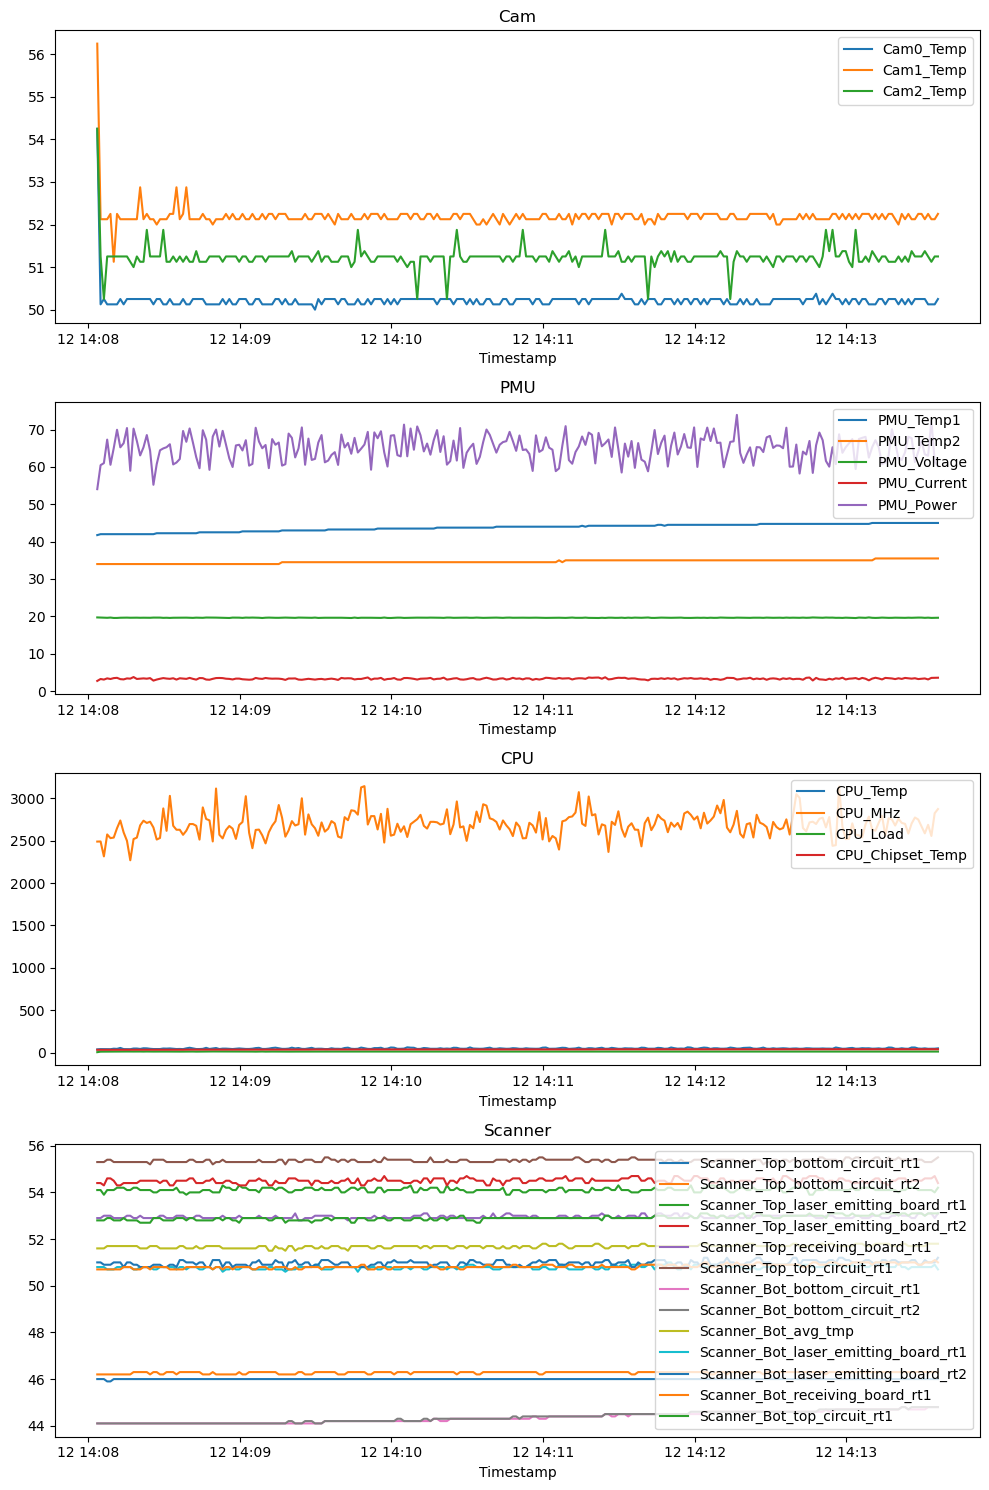

In [66]:
# convert timestamps to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Create a figure with 4 subplots
fig, axs = plt.subplots(4, figsize=(10, 15))

# Plot Cam, PMU, CPU, Scanner
LABELS_SUBSTRINGS = ["Cam", "PMU", "CPU", "Scanner"]
for i in range(0, len(LABELS_SUBSTRINGS)):
    # get all columns with Cam as a substring and plot them and add them to legend
    labels = [x for x in data.columns if LABELS_SUBSTRINGS[i] in x]
    # plot each metric
    for label in labels:
        # suggestion: the labels for scanner could be abbreviated a bit in the legend
        axs[i].plot(data['Timestamp'], data[label], label=label)

    axs[i].set_xlabel('Timestamp')
    axs[i].set_title(LABELS_SUBSTRINGS[i])
    axs[i].legend(loc='upper right')
    
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

## Task 2
For your second task the "Angle" and "Distance" columns are needed.
Those are a response values of one laser scanner which is mounted on our device.
Please plot this data into a separate window, where the distance vales are shown in a polar coordinate system.
As the laser scanner is rotating and creates new distance values in every rotation, we only want to see the newest distance values.

(256,)


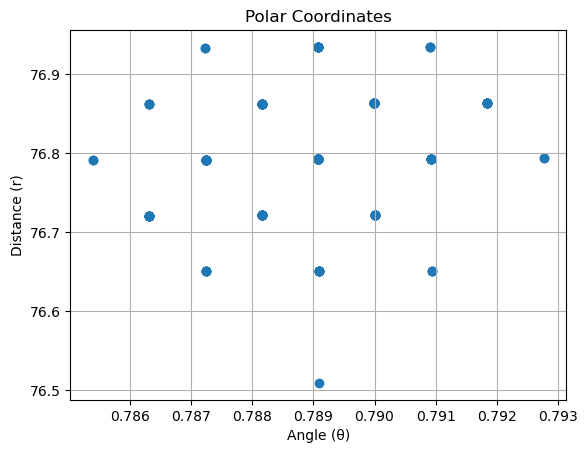

In [74]:
# I do not really understand what the scanner data represent, or which data should be drawn but assuming:
# Scanner_Top_laser_emitting_board_rt1 as x values
# Scanner_Top_laser_emitting_board_rt1 as y values
x = data["Scanner_Top_laser_emitting_board_rt1"]
y = data["Scanner_Top_laser_emitting_board_rt2"]

distances = np.sqrt(np.square(x) + np.square(y))
angles = np.arctan2(y, x)

# Plotting
fig, ax = plt.subplots()
ax.scatter(angles, distances)
ax.set_xlabel('Angle (θ)')
ax.set_ylabel('Distance (r)')
ax.set_title('Polar Coordinates')
ax.grid(True)

plt.show()
